In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import numpy as np
import math

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)

In [3]:
data = pd.read_csv('../raw_data/data_final_indé_medium.csv')

In [4]:
df = data.drop(columns=['steam_appid', 'name', 'english', 'price', 'days_on_steam', 'is_a_remake', 'has_a_website', 'owner_estimated', 'score_descriptif', 'sells_per_days', 'top_5_tags', 'sells_per_days_per_maintopic', 'ponderation_sales_per_topics', 'ratio'])

In [5]:
df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,0.016212,0.016212,0.016212,0.016212,0.401611,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.306578
1,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.687556,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444
2,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.438656,0.016197,0.016197,0.016197,0.269795
3,0.016200,0.016200,0.016200,0.016200,0.431614,0.016200,0.016200,0.016200,0.016200,0.276788,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200
4,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.691257,0.016250,0.016250,0.016250,0.016250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21102,0.016397,0.016397,0.016397,0.016397,0.016397,0.445722,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.259137,0.016397,0.016397,0.016397
21103,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.705831
21104,0.016701,0.016701,0.211801,0.016701,0.016701,0.016701,0.016701,0.016701,0.261572,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.242709,0.016701
21105,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.502025,0.016183,0.016183,0.206678,0.016183,0.016183,0.016183,0.016183


In [6]:
df['Max'] = df.idxmax(axis=1)

In [29]:
df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,Max
0,0.016212,0.016212,0.016212,0.016212,0.401611,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.306578,topic_4
1,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.687556,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,topic_11
2,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.438656,0.016197,0.016197,0.016197,0.269795,topic_15
3,0.016200,0.016200,0.016200,0.016200,0.431614,0.016200,0.016200,0.016200,0.016200,0.276788,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,topic_4
4,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.691257,0.016250,0.016250,0.016250,0.016250,topic_15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21102,0.016397,0.016397,0.016397,0.016397,0.016397,0.445722,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.259137,0.016397,0.016397,0.016397,topic_5
21103,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.705831,topic_19
21104,0.016701,0.016701,0.211801,0.016701,0.016701,0.016701,0.016701,0.016701,0.261572,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.242709,0.016701,topic_8
21105,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.502025,0.016183,0.016183,0.206678,0.016183,0.016183,0.016183,0.016183,topic_12


In [8]:
df2 = df[['Max']]

In [9]:
data = df2.join(data)

In [10]:
data

,Max,steam_appid,name,top_5_tags,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,sells_per_days,sells_per_days_per_maintopic,ponderation_sales_per_topics
0,topic_4,1002,Rag Doll Kung Fu,fighting multiplayer 1980s realistic real_time...,0.016212,0.016212,0.016212,0.016212,0.401611,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.016212,0.306578,1,5.99,4949.0,1,1,22451.0,9,0.701754,4.536472,36.921739,25.713194
1,topic_11,2710,Act of War: Direct Action,action strategy rts 1980s relaxing,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.687556,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,0.016444,1,1.99,4067.0,1,0,29159.0,4,0.845070,7.169658,21.046756,22.639377
2,topic_15,2720,ThreadSpace: Hyperbol,action strategy space 1980s relaxing,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.016197,0.438656,0.016197,0.016197,0.016197,0.269795,1,3.99,4311.0,1,1,21720.0,9,0.775000,5.038274,22.271194,20.493494
3,topic_4,2780,ARMA: Combat Operations,action simulation shooter fps tactical,0.016200,0.016200,0.016200,0.016200,0.431614,0.016200,0.016200,0.016200,0.016200,0.276788,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,0.016200,1,5.99,4067.0,1,1,29546.0,8,0.653153,7.264814,36.921739,31.686904
4,topic_15,2850,X: Tension,simulation strategy space sci_fi space_sim,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.016250,0.691257,0.016250,0.016250,0.016250,0.016250,1,3.49,3127.0,1,1,23225.0,6,0.760000,7.427247,22.271194,23.447014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21102,topic_5,1050210,The Superlatives: Shattered Worlds,adventure rpg text_based realistic real_time_w...,0.016397,0.016397,0.016397,0.016397,0.016397,0.445722,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.016397,0.259137,0.016397,0.016397,0.016397,1,4.79,34.0,1,1,624.0,0,0.666667,18.352941,25.307610,23.034393
21103,topic_19,1050230,Dodge Bubble,casual action 1980s relaxing realistic,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.015483,0.705831,1,0.79,34.0,1,0,4576.0,2,0.954545,134.588235,10.639720,15.361749
21104,topic_8,1050240,MiniGolf,casual mini_golf golf mouse_only relaxing,0.016701,0.016701,0.211801,0.016701,0.016701,0.016701,0.016701,0.016701,0.261572,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.016701,0.242709,0.016701,1,2.99,33.0,1,0,1040.0,5,0.400000,31.515152,17.061785,21.984852
21105,topic_12,1050470,VR health care (aerobic exercise): VR sport an...,sports casual vr vr_only 1980s,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.016183,0.502025,0.016183,0.016183,0.206678,0.016183,0.016183,0.016183,0.016183,1,13.49,33.0,1,0,208.0,1,1.000000,6.303030,20.208132,22.439883


In [11]:
data2 = data.groupby('Max', axis=0, as_index=False ).mean()

In [12]:
data2

,Max,steam_appid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio,sells_per_days,sells_per_days_per_maintopic,ponderation_sales_per_topics
0,topic_0,608253.749604,0.556613,0.022288,0.027362,0.020798,0.030308,0.024165,0.028664,0.021959,0.017319,0.025237,0.028690,0.018972,0.020257,0.027292,0.022011,0.021541,0.018842,0.024403,0.018103,0.025176,0.995246,4.896664,748.522187,1.0,0.668780,11950.339937,4.377971,0.739083,24.601047,24.601047,25.495394
1,topic_1,664800.448753,0.033040,0.506959,0.035174,0.024360,0.031256,0.025740,0.022372,0.021118,0.017200,0.031148,0.017296,0.025004,0.035303,0.028314,0.038853,0.022498,0.019243,0.022956,0.021640,0.020526,0.997230,4.094654,685.930748,1.0,0.588643,9328.282548,3.322715,0.759414,18.712222,18.712222,22.708269
2,topic_10,710344.331455,0.025343,0.018998,0.021715,0.039101,0.038301,0.018779,0.025665,0.019888,0.017916,0.024387,0.559092,0.017510,0.025486,0.022480,0.020344,0.019520,0.019408,0.020315,0.019750,0.026001,0.985915,7.829840,515.142723,1.0,0.607512,8622.254460,4.584038,0.659917,26.715143,26.715143,26.990474
3,topic_11,611458.653555,0.021847,0.029001,0.028525,0.018998,0.023037,0.020085,0.021522,0.021187,0.021088,0.029771,0.020276,0.577417,0.020414,0.029484,0.021188,0.020102,0.016964,0.020614,0.017726,0.020753,0.996974,6.698578,802.883510,1.0,0.656581,10630.414523,4.320726,0.675526,21.046756,21.046756,23.212829
4,topic_12,690604.972569,0.020849,0.025935,0.022477,0.029528,0.029225,0.019073,0.021606,0.020069,0.018910,0.023248,0.021670,0.021944,0.569561,0.025297,0.021969,0.025692,0.019850,0.020437,0.020826,0.021834,0.985869,5.615121,579.416459,1.0,0.599335,7936.054032,4.248545,0.679803,20.208132,20.208132,23.040684
5,topic_13,599704.639303,0.022544,0.024332,0.026575,0.023112,0.032734,0.023751,0.024695,0.025882,0.019815,0.019439,0.028523,0.024042,0.030989,0.524045,0.023147,0.023469,0.019620,0.028850,0.027844,0.026591,0.998756,6.138893,747.291045,1.0,0.690299,12636.936567,4.385572,0.755788,27.454655,27.454655,26.741962
6,topic_14,616283.148559,0.023488,0.023236,0.031456,0.026404,0.023557,0.024240,0.027522,0.026850,0.022841,0.031500,0.022541,0.029514,0.021866,0.023287,0.518444,0.025455,0.021253,0.024625,0.025390,0.026533,0.991131,7.690000,785.778271,1.0,0.707317,14925.197339,3.815965,0.714784,34.358738,34.358738,30.153189
7,topic_15,615092.501190,0.025677,0.023774,0.026755,0.018680,0.027411,0.017992,0.023962,0.020986,0.021669,0.034993,0.019028,0.021324,0.018319,0.022888,0.023197,0.555083,0.020458,0.030392,0.021687,0.025725,0.997619,6.866821,728.147619,1.0,0.704762,10120.709524,4.586905,0.679151,22.271194,22.271194,24.096312
8,topic_16,669335.986130,0.024719,0.023664,0.018122,0.025266,0.019194,0.023966,0.021188,0.017622,0.019828,0.019015,0.018120,0.019737,0.017475,0.017906,0.022290,0.029002,0.606415,0.022709,0.016324,0.017439,0.953537,4.192011,655.590846,1.0,0.561026,6396.724688,4.117198,0.660770,15.157103,15.157103,19.789606
9,topic_17,574509.509031,0.031112,0.024657,0.023907,0.031611,0.025549,0.028325,0.028339,0.026030,0.019845,0.024868,0.021033,0.019518,0.022682,0.029656,0.017709,0.027786,0.040185,0.500880,0.024725,0.031582,0.986864,9.066420,782.087028,1.0,0.755337,14974.105090,5.039409,0.776642,34.553888,34.553888,29.965332


In [13]:
data2 = data2[['Max', 'sells_per_days', 'ratio']]

In [27]:
data2.sort_values('ratio')

,Max,sells_per_days,ratio
18,topic_8,17.061785,0.647673
2,topic_10,26.715143,0.659917
8,topic_16,15.157103,0.660770
3,topic_11,21.046756,0.675526
7,topic_15,22.271194,0.679151
4,topic_12,20.208132,0.679803
15,topic_5,25.307610,0.683027
19,topic_9,30.550360,0.686949
11,topic_19,10.639720,0.687145
16,topic_6,46.122743,0.696273


In [15]:
data = data.merge(data2, on='Max')

In [16]:
data = data.rename(columns={"sells_per_days_y": "sells_per_days_per_maintopic", "sells_per_days_x": "sells_per_days_per_game"})

In [25]:
data.corr()

,steam_appid,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,english,price,days_on_steam,is_a_remake,has_a_website,owner_estimated,score_descriptif,ratio_x,sells_per_days_per_game,sells_per_days_per_maintopic,ponderation_sales_per_topics,sells_per_days_per_maintopic,ratio_y
steam_appid,1.000000,-0.062089,-0.005379,-0.026634,0.077689,-0.049775,0.065331,-0.045358,-0.099821,-0.024673,-0.049202,0.073012,-0.030931,0.042454,-0.047937,-0.039995,-0.033745,0.028924,-0.078848,-0.048579,0.134360,-0.105714,-0.148908,-0.868111,NaN,-0.294889,-0.404527,-0.119326,0.020260,0.152456,-0.054807,-0.069291,-0.054807,-0.081951
topic_0,-0.062089,1.000000,-0.048407,-0.039218,-0.064725,-0.034693,-0.060681,-0.034169,-0.048625,-0.055493,-0.058006,-0.051224,-0.053897,-0.068508,-0.046687,-0.039755,-0.054388,-0.070531,-0.039410,-0.062890,-0.117437,0.031831,-0.032488,0.044353,NaN,0.021569,0.061057,0.010792,0.033579,0.005024,0.036176,0.049508,0.036176,0.191003
topic_1,-0.005379,-0.048407,1.000000,-0.025923,-0.041723,-0.024067,-0.047218,-0.029663,-0.040384,-0.045757,-0.037646,-0.060262,-0.027649,-0.031838,-0.034203,-0.007863,-0.043998,-0.054267,-0.035984,-0.041463,-0.083112,0.028103,-0.043209,0.025046,NaN,-0.009054,0.000634,-0.075721,0.056536,-0.018845,-0.074738,-0.068910,-0.074738,0.212875
topic_2,-0.026634,-0.039218,-0.025923,1.000000,-0.058469,-0.006503,-0.061011,-0.024152,-0.047401,-0.043633,-0.049239,-0.053023,-0.028323,-0.047033,-0.034097,-0.015305,-0.034300,-0.066090,-0.033623,-0.035247,-0.109558,0.029660,-0.012314,0.002829,NaN,0.034965,0.008206,0.028388,0.069261,-0.007116,-0.005711,-0.005827,-0.005711,0.338962
topic_3,0.077689,-0.064725,-0.041723,-0.058469,1.000000,-0.057122,-0.058491,-0.028139,-0.054987,-0.050257,-0.060205,-0.012887,-0.049006,-0.038916,-0.047350,-0.031193,-0.055070,-0.054697,-0.022114,-0.056492,-0.112946,-0.106812,0.051968,-0.070260,NaN,-0.037509,0.095580,-0.002432,0.061411,0.111945,0.501516,0.547071,0.501516,0.318460
topic_4,-0.049775,-0.034693,-0.024067,-0.006503,-0.057122,1.000000,-0.050879,-0.024635,-0.043596,-0.036942,-0.032247,-0.006787,-0.035887,-0.036239,-0.018478,-0.033138,-0.035630,-0.063998,-0.029014,-0.033523,-0.109121,0.027440,0.043761,0.022513,NaN,0.041200,0.107792,0.079665,-0.005954,0.067130,0.235397,0.258904,0.235397,-0.019069
topic_5,0.065331,-0.060681,-0.047218,-0.061011,-0.058491,-0.050879,1.000000,-0.052591,-0.045183,-0.050914,-0.057489,-0.063185,-0.050870,-0.074923,-0.051706,-0.048761,-0.065658,-0.065379,-0.045863,-0.066010,-0.103905,-0.039054,-0.015233,-0.067113,NaN,0.020932,-0.060256,0.052800,-0.022492,0.006062,0.050700,0.049997,0.050700,-0.141298
topic_6,-0.045358,-0.034169,-0.029663,-0.024152,-0.028139,-0.024635,-0.052591,1.000000,-0.044904,-0.035759,-0.028967,-0.036736,-0.035073,-0.044531,-0.030702,-0.013810,-0.031750,-0.049142,-0.020012,-0.025980,-0.095836,0.017378,0.058089,0.012732,NaN,0.045432,0.103465,0.075293,-0.003941,0.081726,0.383872,0.407950,0.383872,-0.014216
topic_7,-0.099821,-0.048625,-0.040384,-0.047401,-0.054987,-0.043596,-0.045183,-0.044904,1.000000,-0.042966,-0.043497,-0.048920,-0.041001,-0.050862,-0.037303,-0.007438,-0.045338,-0.063336,-0.011108,-0.052003,-0.106673,0.024169,0.018795,0.116384,NaN,0.047808,0.021910,-0.097711,0.012334,-0.026341,-0.134124,-0.136253,-0.134124,0.115620
topic_8,-0.024673,-0.055493,-0.045757,-0.043633,-0.050257,-0.036942,-0.050914,-0.035759,-0.042966,1.000000,-0.032665,-0.044330,-0.025079,-0.046721,-0.037683,-0.028854,-0.041863,-0.051516,-0.039540,-0.037226,-0.101013,-0.003095,0.049169,0.038307,NaN,-0.004772,-0.022139,-0.013672,-0.049829,-0.022959,-0.103377,-0.112690,-0.103377,-0.270711


In [18]:
data['ponderation_sales_per_topics']= data['topic_0']*24.601047 + data['topic_1']*18.712222 + data['topic_2']*21.696927 + data['topic_3']*46.708975 + data['topic_4']*36.921739 + data['topic_5']*25.307610 + data['topic_6']*46.122743 + data['topic_7']*15.897915 + data['topic_8']*17.061785 + data['topic_9']*30.550360 + data['topic_10']*26.715143 + data['topic_11']*21.046756 + data['topic_12']*20.208132 + data['topic_13']*27.454655 + data['topic_14']*34.358738 + data['topic_15']*22.271194 + data['topic_16']*15.157103 + data['topic_17']*34.553888 + data['topic_18']*21.797060 + data['topic_19']*10.639720

In [19]:
data_ponderation = data[['steam_appid', 'sells_per_days_per_maintopic', 'ponderation_sales_per_topics']]

In [20]:
resultat = []
for i in range(1,31):
    resultat.append((math.log(i*25.713194)))
resultat

[3.2470042453780787,
 3.940151425938024,
 4.345616534046188,
 4.63329860649797,
 4.856442157812179,
 5.038763714606134,
 5.192914394433393,
 5.3264457870579145,
 5.444228822714298,
 5.549589338372124,
 5.64489951817645,
 5.731910895166079,
 5.8119536028396155,
 5.886061574993338,
 5.955054446480289,
 6.01959296761786,
 6.080217589434295,
 6.137376003274244,
 6.1914432245445195,
 6.24273651893207,
 6.291526683101502,
 6.338046698736395,
 6.382498461307229,
 6.4250580757260245,
 6.46588007024628,
 6.505100783399561,
 6.542841111382408,
 6.5792087555532826,
 6.614300075364553,
 6.648201627040234]

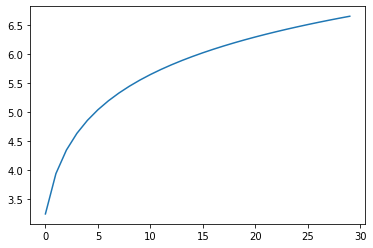

In [21]:
plt.plot(range(0,30), resultat)

In [22]:
data_ponderation

,steam_appid,sells_per_days_per_maintopic,sells_per_days_per_maintopic,ponderation_sales_per_topics
0,1002,36.921739,36.921739,25.713194
1,2780,36.921739,36.921739,31.686904
2,10460,36.921739,36.921739,26.182364
3,12390,36.921739,36.921739,28.325474
4,27920,36.921739,36.921739,30.203673
...,...,...,...,...
21102,1043200,46.708975,46.708975,39.999013
21103,1043510,46.708975,46.708975,40.018557
21104,1045850,46.708975,46.708975,37.048736
21105,1047160,46.708975,46.708975,40.014552


In [23]:
data_ponderation.to_csv(r'data_ponderation.csv', index = False)